# Structural Estimation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy.optimize as opt
import math
import scipy

## Exercise 1

### Part 1

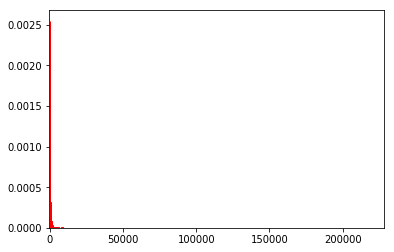

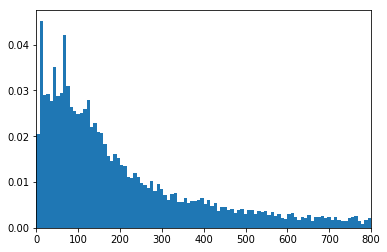

In [2]:
#Import txt file with claim data
claims = np.loadtxt("Data/clms.txt")
# Plot histograms NOTE PERCENT THING IS WRONG MUST CHANGE

weights = (1 / len(claims)) * np.ones_like(claims)

plt.hist(claims, density=True, bins= 1000, weights = weights, edgecolor="red")
plt.xlim(-500, claims.max())
plt.show()

weightslimited = 1/(len(claims[claims<800])) * np.ones_like(claims[claims<800])

plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.xlim(0, 800)
plt.show()
    

The second histogram is preferable to the first one, because the data is actually legible.

### Part b

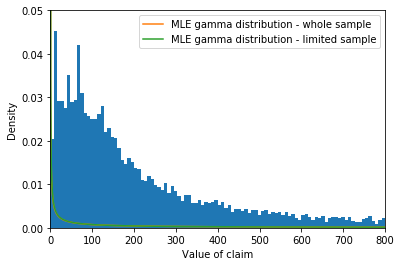

 Whole Sample: 
 alpha =  0.22175531700084541 
 beta =  21911.06469927569 
 Limited Sample: 
 alpha =  0.20348864099178415 
 beta =  21911.064699783838


In [3]:
#define clean part of f.
claimslimited = claims[claims<800]

#Define a function for the gamma distribution
def GApdf(x, alpha, beta):
    pdfval = 1/(beta ** alpha * (math.gamma(alpha)) ) \
             * x ** (alpha- 1) * np.exp(-(x/beta))
    return pdfval

#Define criterion function
def crit1b(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta
    '''
    X = args
    alpha, beta = params
    #Get log-likelihood
    pdfval = GApdf(X, alpha, beta)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = np.sum(log_pdf_val)
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0
guess = [alpha0, beta0]

#Pull results
bds = ((1e-5, None), (1e-5, None))
results = opt.minimize(crit1b, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1b, guess, args = claimslimited, bounds = bds)
alpha, beta = results.x
alphalimited, betalimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GApdf(xgrid, alpha, beta)
limitedresultsgrid = GApdf(xgrid, alphalimited, betalimited)

#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE gamma distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE gamma distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()


#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
      "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited)

Weirdly it doesn't even seem to matter if I limit my sample to only the observations which are less than 800.

### Part c

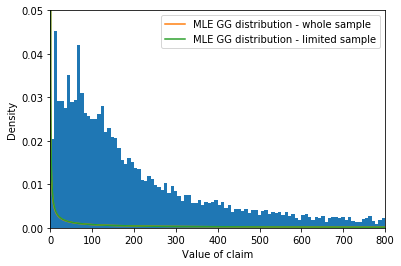

 Whole Sample: 
 alpha =  0.22175388191916012 
 beta =  21911.06437456292 
 m = 0.9977001712681741 
 Limited Sample: 
 alpha =  0.2034851449617037 
 beta =  21911.064638789405 
 m =  0.8868958758893984


In [4]:
#Define a function for the gamma distribution
def GGpdf(x, alpha, beta, m):
    pdfval = m/(beta ** alpha * (math.gamma(alpha/m)) ) \
             * x ** (alpha- 1) * np.exp(-(x/beta)**m)
    return pdfval

#Define criterion function
def crit1c(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta, m
    '''
    X = args
    alpha, beta, m = params
    #Get log-likelihood
    pdfval = GGpdf(X, alpha, beta, m)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = np.sum(log_pdf_val)
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0
m0 = 1
guess = [alpha0, beta0, m0]

#Pull results
bds = ((1e-5, None), (1e-5, None), (1e-5, None))
results = opt.minimize(crit1c, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1c, guess, args = claimslimited, bounds = bds)
alpha, beta, m = results.x
alphalimited, betalimited, mlimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GGpdf(xgrid, alpha, beta, m)
limitedresultsgrid = GGpdf(xgrid, alphalimited, betalimited, mlimited)

#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE GG distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE GG distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()


#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
       "\n m =", m, \
      "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited, \
       "\n m = ", mlimited)

### Part (d)

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


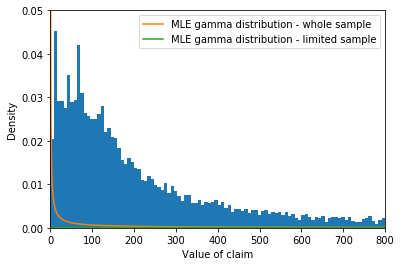

 Whole Sample: 
 alpha =  0.10777348960309872 
 beta =  21911.07099898858 
 p = 61.2760261154972 
 q = 102.1584824409633 
 Limited Sample: 
 alpha =  0.9787247608992424 
 beta =  21911.05377033113 
 p = 1.1884189025004108 
 q = 120.13896050042712


In [5]:
#define clean part of f.
claimslimited = claims[claims<800]

#Define a function for the gamma distribution
def GB2pdf(x, alpha, beta, p, q):
    pdfval = alpha*x**(alpha*p-1) / (beta**(alpha*p)
             *scipy.special.beta(p, q)*(1+(x/beta)**alpha)**(p+q))
    return pdfval

#Define criterion function
def crit1d(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta, p, q
    '''
    X = args
    alpha, beta, p, q = params
    #Get log-likelihood
    pdfval = GB2pdf(X, alpha, beta, p, q)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = np.sum(log_pdf_val)
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0
p0 = 1
q0 = 1

guess = [alpha0, beta0, p0, q0]

#Pull results
bds = ((1e-5, None), (1e-5, None), (1e-5, None), (1e-5, None))
results = opt.minimize(crit1d, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1d, guess, args = claimslimited, bounds = bds)
alpha, beta, p ,q = results.x
alphalimited, betalimited, plimited, qlimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GApdf(xgrid, alpha, beta)
limitedresultsgrid = GApdf(xgrid, alphalimited, betalimited)

#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE gamma distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE gamma distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()

#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
       "\n p =", p, \
       "\n q =", q, \
       "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited,
       "\n p =", plimited, \
       "\n q =", qlimited )

## Exercise 2

In [7]:
#Readin
data = pd.read_csv("Data/MacroSeries.txt", header = None)
data.columns = ['c','k','w','r','y']

### Part (a)

I went to war with this one for hours, but I couldn't get my algorithm to converge, so I just used Tim's code.

In [213]:
macdata = pd.read_csv('Data/MacroSeries.txt', header=None)
macdata.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

,ct,kt,wt,rt,yt
0,1.128323e+07,8.040697e+06,1.120211e+07,1.008852,1.931398e+07
1,1.215464e+07,8.030754e+06,1.206726e+07,1.088112,2.080561e+07
2,1.097303e+07,8.650974e+06,1.089414e+07,0.911904,1.878300e+07
3,9.711635e+06,7.809971e+06,9.641815e+06,0.893986,1.662382e+07
4,9.245673e+06,6.912184e+06,9.179203e+06,0.961637,1.582621e+07


In [214]:
def get_z(w, k, alpha): 
    '''Get me a series of z's for some series of k and w and a parameter alpha'''
    zt = np.log(w/((1-alpha)*k**alpha))
    return zt
    
def log_lik_BM_1(w, k, alpha, mu, sigma, rho):
    '''Get me the log likelihood of the z values pdf for some data and params'''
    zvals = get_z(w, k, alpha)
    log_lik_val = 0
    for i in range(len(zvals)):
        if i == 0:
            pdf_val = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf_val = norm.pdf(zvals[i], loc=(rho*zvals[i-1] + (1-rho)*mu), scale=sigma)
        ln_pdf_val = np.log(pdf_val)
        log_lik_val += ln_pdf_val
    return log_lik_val

def crit_BM_1(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    alpha, mu, sigma, rho = params
    w, k = args
    log_lik_val = log_lik_BM_1(w, k, alpha, mu, sigma, rho)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val

In [219]:
params_init_BM_1 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args = (macdata.wt, macdata.kt)
results_BM_1 = opt.minimize(crit_BM_1, params_init_BM_1, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
alpha_mle, mu_mle, sigma_mle, rho_mle = results_BM_1.x
loglikval_BM = -results_BM_1.fun
IHVCV = -results_BM_1.hess_inv.todense()
#print(results_BM_1)
print('alpha_mle=', alpha_mle, '\n mu_mle=', mu_mle, '\n sigma_mle:', sigma_mle, '\n rho_mle:', rho_mle, '\n Loglikvalmax=', loglikval_BM, "\n InvHessVarCovar =", IHVCV)

alpha_mle= 0.5533950092374852 
 mu_mle= 8.106670099451671 
 sigma_mle: 0.09278028683172274 
 rho_mle: 0.8246557936631542 
 Loglikvalmax= 95.85827569024597 
 InvHessVarCovar = [[-1.25357145e+01  1.65355146e+02  5.03866066e-01  1.89586233e+00]
 [ 1.65355146e+02 -2.18117299e+03 -6.64523201e+00 -2.50675225e+01]
 [ 5.03866066e-01 -6.64523201e+00 -2.03966052e-02 -7.20571123e-02]
 [ 1.89586233e+00 -2.50675225e+01 -7.20571123e-02 -5.19281931e-01]]


### Part (b)

In [231]:
def get_z_2(r, k, alpha): 
    '''Get me a series of z's for some series of k and r and a parameter alpha'''
    zt = np.log(r/((alpha)*k**(alpha-1)))
    return zt
    
def log_lik_BM_2(r, k, alpha, mu, sigma, rho):
    '''Get me the log likelihood of the z values pdf for some data and params'''
    zvals = get_z_2(r, k, alpha)
    log_lik_val = 0
    for i in range(len(zvals)):
        if i == 0:
            pdf_val = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf_val = norm.pdf(zvals[i], loc=(rho*zvals[i-1] + (1-rho)*mu), scale=sigma)
        ln_pdf_val = np.log(pdf_val)
        log_lik_val += ln_pdf_val
    return log_lik_val

def crit_BM_2(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    alpha, mu, sigma, rho = params
    r, k = args
    log_lik_val = log_lik_BM_2(r, k, alpha, mu, sigma, rho)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val


In [233]:
params_init_BM_2 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args = (macdata.rt, macdata.kt)
results_BM_2 = opt.minimize(crit_BM_2, params_init_BM_2, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
alpha_mle, mu_mle, sigma_mle, rho_mle = results_BM_2.x
loglikval_BM = -results_BM_2.fun
IHVCV = -results_BM_2.hess_inv.todense()
#print(results_BM_2)
print('alpha_mle=', alpha_mle, '\n mu_mle=', mu_mle, '\n sigma_mle:', sigma_mle, '\n rho_mle:', rho_mle, '\n Loglikvalmax=', loglikval_BM, "\n InvHessVarCovar =", IHVCV)

alpha_mle= 0.553340406136769 
 mu_mle= 7.570429565482019 
 sigma_mle: 0.09278247677902113 
 rho_mle: 0.8246543401866663 
 Loglikvalmax= 95.85827530681503 
 InvHessVarCovar = [[-1.12980211e+01  1.88462796e+02 -6.75337000e-01  6.34534111e+00]
 [ 1.88462796e+02 -3.14933614e+03  9.79680551e+00 -1.00129641e+02]
 [-6.75337000e-01  9.79680551e+00 -4.27523164e-01  1.88726805e+00]
 [ 6.34534111e+00 -1.00129641e+02  1.88726805e+00 -9.44329792e+00]]


### Part (c)

In [248]:
#get estimates from part a 
params_init_BM_1 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args = (macdata.wt, macdata.kt)
results_BM_1 = opt.minimize(crit_BM_1, params_init_BM_1, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
params = results_BM_1.x
print(params)

[0.55339501 8.1066701  0.09278029 0.82465579]


In [259]:
# I will define a more general function.
def intgreaterthan(r, k, ztm1, params):
    '''
    This function gives the probability that the interest
    rate is greater than r given inputs k, ztm1, the capital
    in the current period and shock from last period
    '''
    alpha, mu, sigma, rho = params
    #get z_t such that r is the interest rate
    impliedz = get_z_2(r, k, alpha)
    #find probability tht z_t > impliedz
    cdf = norm.cdf(impliedz, (rho * ztm1 + (1 - rho) * mu), sigma)
    prob = 1 - cdf
    return prob

print("Probaility that interest rate > 1 is:", intgreaterthan(1, 7500000, 10, params))

Probaility that interest rate > 1 is: 1.0


# GMM

## Problem 2

### Part (a)